In [1]:
import pandas as pd
%matplotlib inline
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df1=pd.read_excel('Teste excel - Business Intelligence.xlsx')
df1.rename(columns={'Empresa Contratante': 'EMPRESAS '}, inplace = True)
df1.head()


,Candidatos Contratados,EMPRESAS,Data do convite de entrevista,Data de Confirmação da contratação (Dia em que a GeekHunter fatura),TOTAL a receber
0,Candidato 1,Empresa A,2015-06-30,2015-07-07,7250.69
1,Candidato 2,Empresa B,2015-06-30,2015-07-23,7000.00
2,Candidato 3,Empresa C,2015-06-22,2015-06-29,4500.00
3,Candidato 4,Empresa A,2015-08-13,2015-09-02,7000.00
4,Candidato 5,Empresa D,2015-08-11,2015-10-28,28986.53


In [3]:
#primeiro vamos analisar os formatos das colunas do dataframe
df1.info()
#ja está no formato correto  as linhas que estão como data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column                                                               Non-Null Count  Dtype         
---  ------                                                               --------------  -----         
 0   Candidatos Contratados                                               40 non-null     object        
 1   EMPRESAS                                                             40 non-null     object        
 2   Data do convite de entrevista                                        40 non-null     datetime64[ns]
 3   Data de Confirmação da contratação (Dia em que a GeekHunter fatura)  40 non-null     datetime64[ns]
 4   TOTAL a receber                                                      40 non-null     float64       
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 1.7+ KB


In [4]:
#vendo tempo medio da empresa de contração
df1['tempo_contratacao']=df1['Data de Confirmação da contratação (Dia em que a GeekHunter fatura)']-df1['Data do convite de entrevista']
df1.head()

,Candidatos Contratados,EMPRESAS,Data do convite de entrevista,Data de Confirmação da contratação (Dia em que a GeekHunter fatura),TOTAL a receber,tempo_contratacao
0,Candidato 1,Empresa A,2015-06-30,2015-07-07,7250.69,7 days
1,Candidato 2,Empresa B,2015-06-30,2015-07-23,7000.00,23 days
2,Candidato 3,Empresa C,2015-06-22,2015-06-29,4500.00,7 days
3,Candidato 4,Empresa A,2015-08-13,2015-09-02,7000.00,20 days
4,Candidato 5,Empresa D,2015-08-11,2015-10-28,28986.53,78 days


In [5]:
#calculando o tempo médio de contratação
df1['tempo_contratacao'].mean()
#ou seja o tempo médio de contratação é de 32 dias

Timedelta('32 days 00:00:00')

In [6]:
#quanto o total a receber reflete na empresa,transformando em dataframe
total_receber=df1.groupby('EMPRESAS ')['TOTAL a receber'].mean().to_frame()
total_receber

,TOTAL a receber
EMPRESAS,
Empresa A,7125.3450
Empresa B,7000.0000
Empresa C,4500.0000
Empresa D,11146.6325
Empresa E,13000.0000
Empresa F,4821.5000
Empresa G,7225.0000
Empresa H,4650.0000
Empresa I,3400.0000


Text(0, 0.5, 'total a receber')

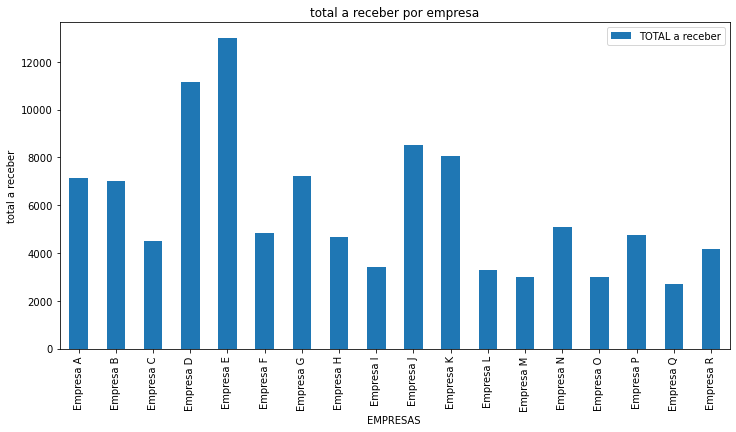

In [7]:
total_receber.plot.bar(figsize=(12,6))
plt.title('total a receber por empresa')
plt.ylabel('total a receber')

In [8]:
#agora vamos ver os numero de contrações
print(f'o numero de contratação é {len(df1)}')

o numero de contratação é 40


In [9]:
#melhores clientes, vamos abrir agora a outra sheep, e vamos sincronizar com o dataframe total_receber criado
df2=pd.read_excel('Teste excel - Business Intelligence.xlsx','EMPRESAS')
df2

,EMPRESAS,CIDADE,Número de funcionários atuais na empresa,Qual o faturamento trazido por cada empresa em 2015?,Qual o faturamento trazido por cada empresa em 2016?,Qual o cluster cada empresa deve estar classificada?
0,Empresa A,São Paulo,1000,NaN,NaN,NaN
1,Empresa B,Florianóplis,120,NaN,NaN,NaN
2,Empresa C,Florianóplis,5,NaN,NaN,NaN
3,Empresa D,Florianóplis,55,NaN,NaN,NaN
4,Empresa E,Florianóplis,60,NaN,NaN,NaN
5,Empresa F,Florianóplis,520,NaN,NaN,NaN
6,Empresa G,São Paulo,340,NaN,NaN,NaN
7,Empresa H,São Paulo,2000,NaN,NaN,NaN
8,Empresa I,São Paulo,10,NaN,NaN,NaN
9,Empresa J,Curitiba,20,NaN,NaN,NaN


In [10]:
df2['media_receber']=total_receber
df2

,EMPRESAS,CIDADE,Número de funcionários atuais na empresa,Qual o faturamento trazido por cada empresa em 2015?,Qual o faturamento trazido por cada empresa em 2016?,Qual o cluster cada empresa deve estar classificada?,media_receber
0,Empresa A,São Paulo,1000,NaN,NaN,NaN,NaN
1,Empresa B,Florianóplis,120,NaN,NaN,NaN,NaN
2,Empresa C,Florianóplis,5,NaN,NaN,NaN,NaN
3,Empresa D,Florianóplis,55,NaN,NaN,NaN,NaN
4,Empresa E,Florianóplis,60,NaN,NaN,NaN,NaN
5,Empresa F,Florianóplis,520,NaN,NaN,NaN,NaN
6,Empresa G,São Paulo,340,NaN,NaN,NaN,NaN
7,Empresa H,São Paulo,2000,NaN,NaN,NaN,NaN
8,Empresa I,São Paulo,10,NaN,NaN,NaN,NaN
9,Empresa J,Curitiba,20,NaN,NaN,NaN,NaN


In [11]:
dic={'Empresa A':'7125.3450',
'Empresa B':'7000.0000',
'Empresa C':'4500.0000',
'Empresa D':'11146.6325',
'Empresa E':'13000.0000',
'Empresa F':'4821.5000',
'Empresa G':'7225.0000',
'Empresa H':'4650.0000',
'Empresa I':'3400.0000',
'Empresa J':'8500.0000',
'Empresa K':'8050.0000',
'Empresa L':'3300.0000',
'Empresa M':'3000.0000',
'Empresa N':'5076.5000',
'Empresa O':'3000.0000',
'Empresa P':'4750.0000',
'Empresa Q':'2700.0000',
'Empresa R':'4164.0000'}

In [12]:
def func(x):
    return dic[x]

In [13]:
#agora sabemos quan
df2['media_receber']=df2['EMPRESAS '].apply(lambda x:func((x)))
df2.rename(columns={'Qual o faturamento trazido por cada empresa em 2015?': 'faturamento 2015'}, inplace = True)
df2.rename(columns={'Qual o faturamento trazido por cada empresa em 2016?': 'faturamento 2016'}, inplace = True)
df2


,EMPRESAS,CIDADE,Número de funcionários atuais na empresa,faturamento 2015,faturamento 2016,Qual o cluster cada empresa deve estar classificada?,media_receber
0,Empresa A,São Paulo,1000,NaN,NaN,NaN,7125.3450
1,Empresa B,Florianóplis,120,NaN,NaN,NaN,7000.0000
2,Empresa C,Florianóplis,5,NaN,NaN,NaN,4500.0000
3,Empresa D,Florianóplis,55,NaN,NaN,NaN,11146.6325
4,Empresa E,Florianóplis,60,NaN,NaN,NaN,13000.0000
5,Empresa F,Florianóplis,520,NaN,NaN,NaN,4821.5000
6,Empresa G,São Paulo,340,NaN,NaN,NaN,7225.0000
7,Empresa H,São Paulo,2000,NaN,NaN,NaN,4650.0000
8,Empresa I,São Paulo,10,NaN,NaN,NaN,3400.0000
9,Empresa J,Curitiba,20,NaN,NaN,NaN,8500.0000


In [14]:
#5 melhores clientes (maior faturamento)

In [15]:
df2['media_receber']

0      7125.3450
1      7000.0000
2      4500.0000
3     11146.6325
4     13000.0000
5      4821.5000
6      7225.0000
7      4650.0000
8      3400.0000
9      8500.0000
10     8050.0000
11     3300.0000
12     3000.0000
13     5076.5000
14     3000.0000
15     4750.0000
16     2700.0000
17     4164.0000
Name: media_receber, dtype: object

In [16]:
#top 5 com maiores faturamentos
df2.iloc[['4','3','9','10','6']]
#ou seja empresas E,D,J,K,G

,EMPRESAS,CIDADE,Número de funcionários atuais na empresa,faturamento 2015,faturamento 2016,Qual o cluster cada empresa deve estar classificada?,media_receber
4,Empresa E,Florianóplis,60,NaN,NaN,NaN,13000.0000
3,Empresa D,Florianóplis,55,NaN,NaN,NaN,11146.6325
9,Empresa J,Curitiba,20,NaN,NaN,NaN,8500.0000
10,Empresa K,Rio de Janeiro,15,NaN,NaN,NaN,8050.0000
6,Empresa G,São Paulo,340,NaN,NaN,NaN,7225.0000


In [17]:
df1.rename(columns={'Data de Confirmação da contratação (Dia em que a GeekHunter fatura)': 'data'}, inplace = True)
df1.head()

,Candidatos Contratados,EMPRESAS,Data do convite de entrevista,data,TOTAL a receber,tempo_contratacao
0,Candidato 1,Empresa A,2015-06-30,2015-07-07,7250.69,7 days
1,Candidato 2,Empresa B,2015-06-30,2015-07-23,7000.00,23 days
2,Candidato 3,Empresa C,2015-06-22,2015-06-29,4500.00,7 days
3,Candidato 4,Empresa A,2015-08-13,2015-09-02,7000.00,20 days
4,Candidato 5,Empresa D,2015-08-11,2015-10-28,28986.53,78 days


In [18]:
#agora separamos em anos
df1['year'] = pd.DatetimeIndex(df1['data']).year
df1

,Candidatos Contratados,EMPRESAS,Data do convite de entrevista,data,TOTAL a receber,tempo_contratacao,year
0,Candidato 1,Empresa A,2015-06-30,2015-07-07,7250.69,7 days,2015
1,Candidato 2,Empresa B,2015-06-30,2015-07-23,7000.00,23 days,2015
2,Candidato 3,Empresa C,2015-06-22,2015-06-29,4500.00,7 days,2015
3,Candidato 4,Empresa A,2015-08-13,2015-09-02,7000.00,20 days,2015
4,Candidato 5,Empresa D,2015-08-11,2015-10-28,28986.53,78 days,2015
5,Candidato 6,Empresa D,2015-10-14,2015-10-28,4800.00,14 days,2015
6,Candidato 7,Empresa D,2015-11-03,2015-11-18,5000.00,15 days,2015
7,Candidato 8,Empresa D,2015-10-05,2015-12-10,5800.00,66 days,2015
8,Candidato 9,Empresa E,2015-09-22,2015-11-18,13000.00,57 days,2015
9,Candidato 10,Empresa F,2016-01-14,2016-01-29,4000.00,15 days,2016


In [19]:
#vamos ver o faturamento de cada empresa em 2015
df_2015=df1[df1['year']==2015]
df_2015.groupby('EMPRESAS ')['TOTAL a receber'].mean()
#temos a média de receber por ano de cada empresa 

EMPRESAS 
Empresa A     7125.3450
Empresa B     7000.0000
Empresa C     4500.0000
Empresa D    11146.6325
Empresa E    13000.0000
Name: TOTAL a receber, dtype: float64

In [20]:
list=[7125.3450,7000.0000,4500.0000,11146.6325,13000.0000]
for c in range(len(list)):
    df2['faturamento 2015'][c]=list[c]

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
df2.head()

,EMPRESAS,CIDADE,Número de funcionários atuais na empresa,faturamento 2015,faturamento 2016,Qual o cluster cada empresa deve estar classificada?,media_receber
0,Empresa A,São Paulo,1000,7125.3450,NaN,NaN,7125.3450
1,Empresa B,Florianóplis,120,7000.0000,NaN,NaN,7000.0000
2,Empresa C,Florianóplis,5,4500.0000,NaN,NaN,4500.0000
3,Empresa D,Florianóplis,55,11146.6325,NaN,NaN,11146.6325
4,Empresa E,Florianóplis,60,13000.0000,NaN,NaN,13000.0000


In [22]:
#agora vamos ver o faturamento de 2016
df2016=df1[df1['year']==2016]
df2016=df2016.groupby('EMPRESAS ')['TOTAL a receber'].mean().to_frame()

In [23]:
df2.join(df2016,'EMPRESAS ')

,EMPRESAS,CIDADE,Número de funcionários atuais na empresa,faturamento 2015,faturamento 2016,Qual o cluster cada empresa deve estar classificada?,media_receber,TOTAL a receber
0,Empresa A,São Paulo,1000,7125.3450,NaN,NaN,7125.3450,NaN
1,Empresa B,Florianóplis,120,7000.0000,NaN,NaN,7000.0000,NaN
2,Empresa C,Florianóplis,5,4500.0000,NaN,NaN,4500.0000,NaN
3,Empresa D,Florianóplis,55,11146.6325,NaN,NaN,11146.6325,NaN
4,Empresa E,Florianóplis,60,13000.0000,NaN,NaN,13000.0000,NaN
5,Empresa F,Florianóplis,520,NaN,NaN,NaN,4821.5000,4821.5
6,Empresa G,São Paulo,340,NaN,NaN,NaN,7225.0000,7225.0
7,Empresa H,São Paulo,2000,NaN,NaN,NaN,4650.0000,4650.0
8,Empresa I,São Paulo,10,NaN,NaN,NaN,3400.0000,3400.0
9,Empresa J,Curitiba,20,NaN,NaN,NaN,8500.0000,8500.0


In [ ]:
df2['faturamento 2016']=